In [ ]:
# Libraries That needs to be installed

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores,  split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,and
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file= pd.read_csv('/content/drive/MyDrive/Great Learning/EasyVisa.csv')

In [ ]:
data1=file.copy()

In [ ]:
data1.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
data1.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


In [ ]:
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Duplicates=int(data1.duplicated().sum())
print(f"The number of duplicates in the data set is :{Duplicates}")

The number of duplicates in the data set is :0


In [ ]:
data1.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
data1.shape

(25480, 12)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


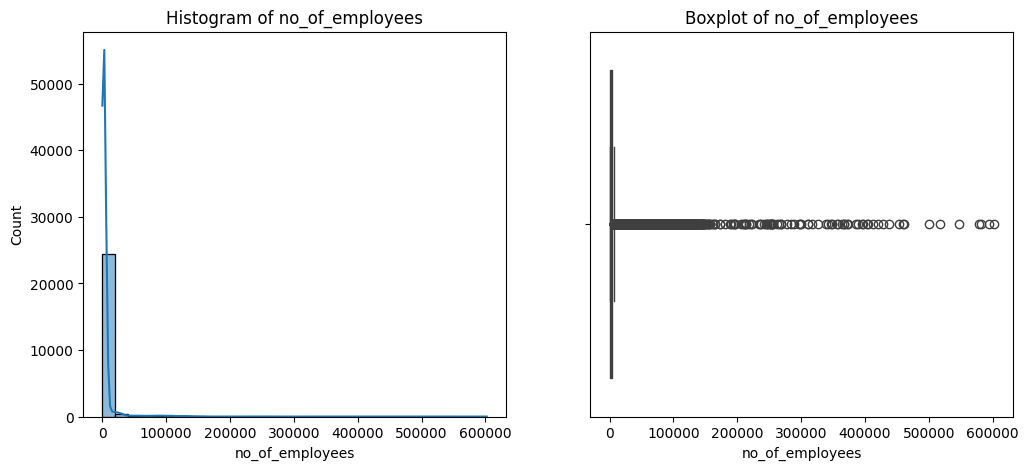

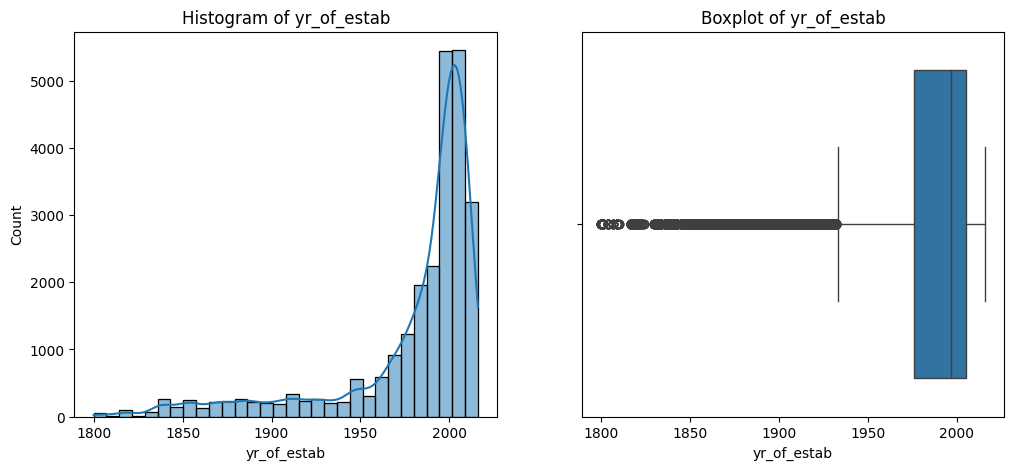

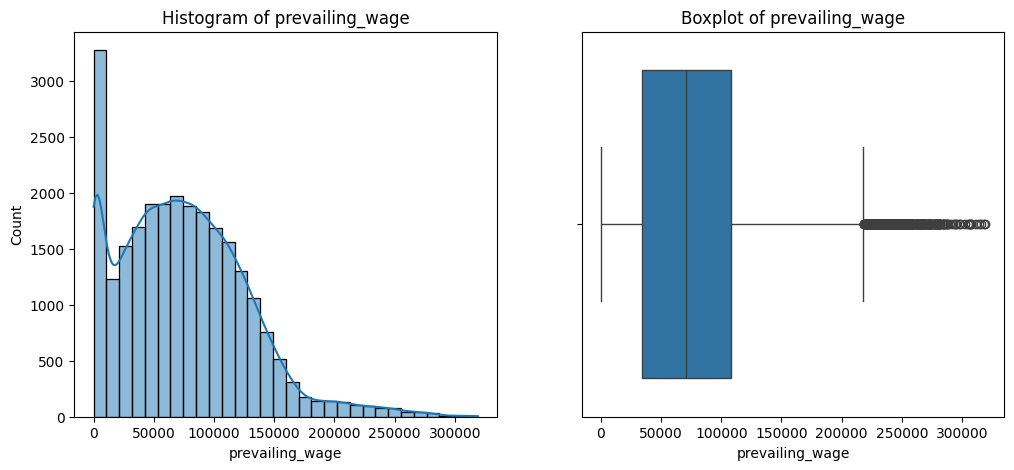

In [ ]:
numerical_column = data1.select_dtypes(include=['int64', 'float64'])
for i, col in enumerate(numerical_column):
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data1[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data1[col])
    plt.title(f'Boxplot of {col}')


In [ ]:
Negative_Employees= data1[data1['no_of_employees'] < 0]
Negative_Employees

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.990,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.140,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.940,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.460,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.970,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.320,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.950,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.500,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.610,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.510,Year,Y,Certified


In [ ]:
data1['no_of_employees']= abs(data1['no_of_employees'])
no_of_employees= data1[data1['no_of_employees'] < 0]
print(f"The Number of Negative employees after treatment is {no_of_employees}")

The Number of Negative employees after treatment is Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []


In [ ]:
# Step 1: Find the minimum wage
min_wage = data1['prevailing_wage'].min()

# Step 2: Filter rows where the prevailing_wage equals the minimum
Prevailing_Wages = data1[data1['prevailing_wage'] == min_wage]

# Step 3: Display the row(s)
Prevailing_Wages

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
20575,EZYV20576,North America,Master's,N,N,1552,2004,Northeast,2.137,Hour,Y,Certified


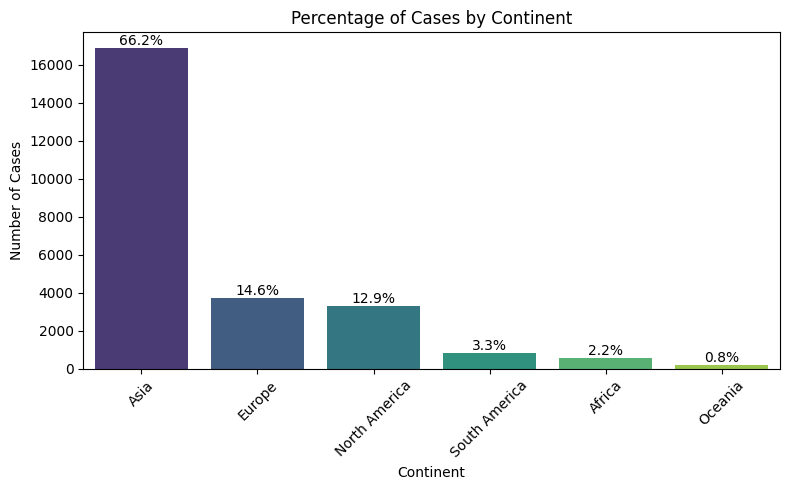

In [ ]:
order = data1['continent'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='continent', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Percentage of Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

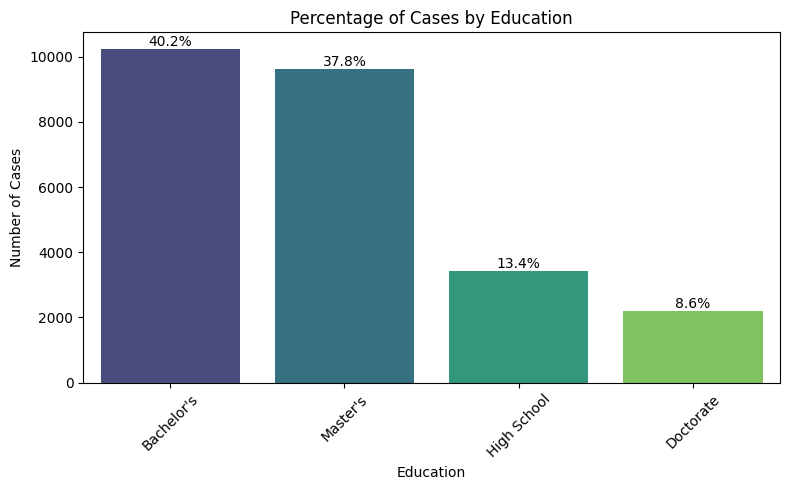

In [ ]:
order = data1['education_of_employee'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='education_of_employee', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Percentage of Cases by Education')
plt.xlabel('Education')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

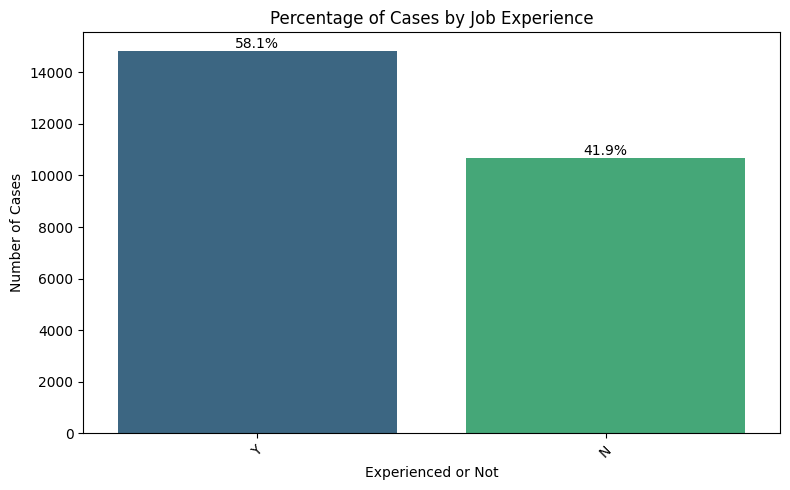

In [ ]:
order = data1['has_job_experience'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='has_job_experience', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Percentage of Cases by Job Experience')
plt.xlabel('Experienced or Not')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

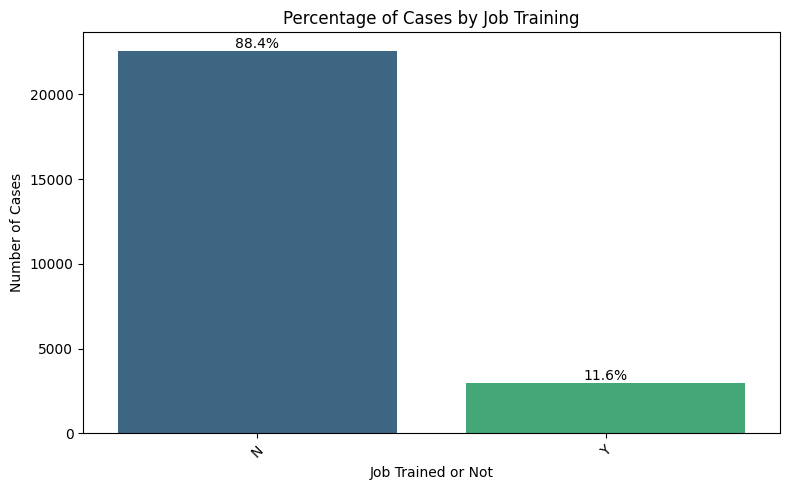

In [ ]:
order = data1['requires_job_training'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='requires_job_training', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Percentage of Cases by Job Training')
plt.xlabel('Job Trained or Not')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

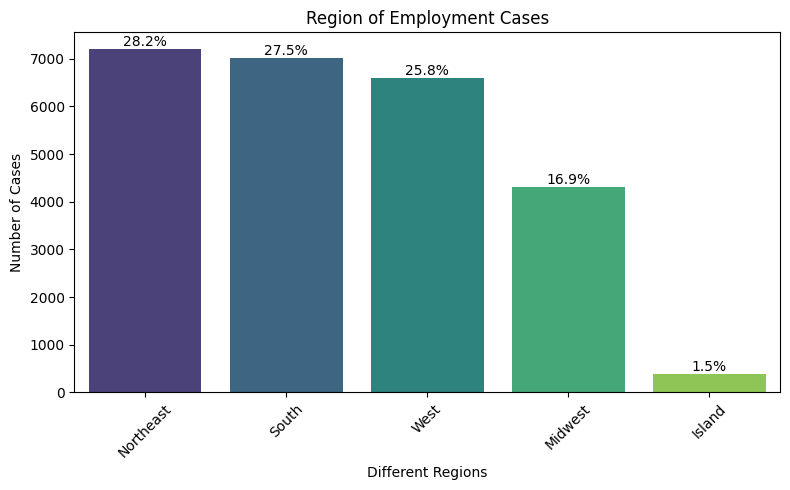

In [ ]:
order = data1['region_of_employment'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='region_of_employment', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Region of Employment Cases')
plt.xlabel('Different Regions')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

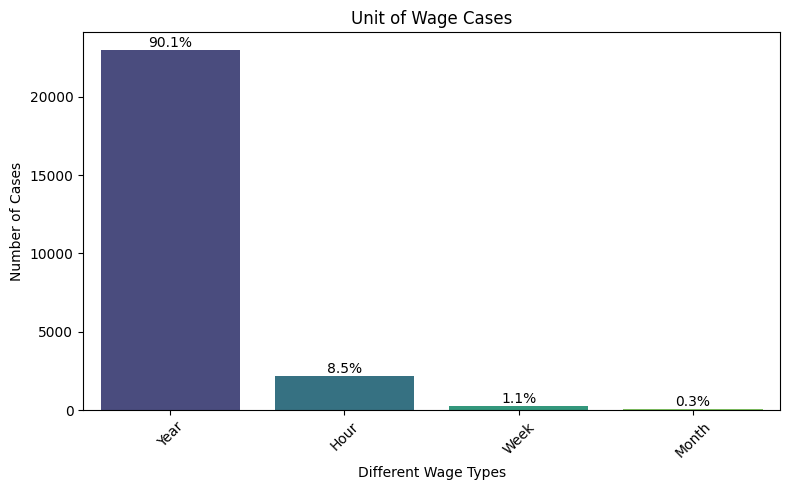

In [ ]:
order = data1['unit_of_wage'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='unit_of_wage', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Unit of Wage Cases')
plt.xlabel('Different Wage Types')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

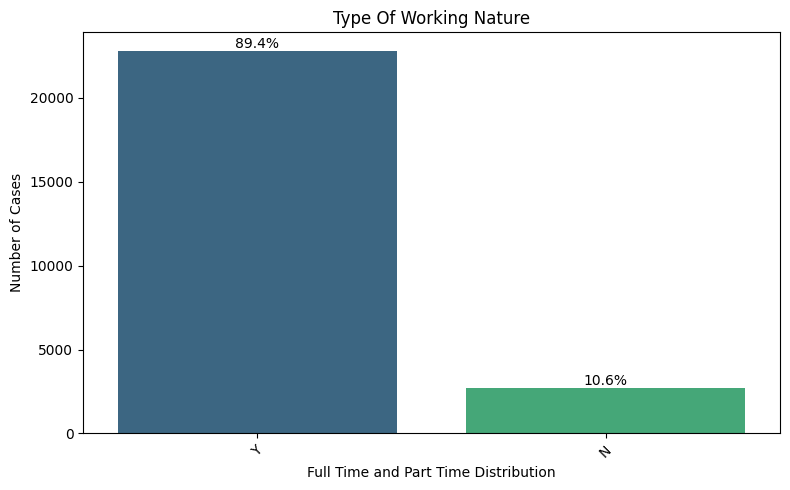

In [ ]:
order = data1['full_time_position'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='full_time_position', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Type Of Working Nature')
plt.xlabel('Full Time and Part Time Distribution')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

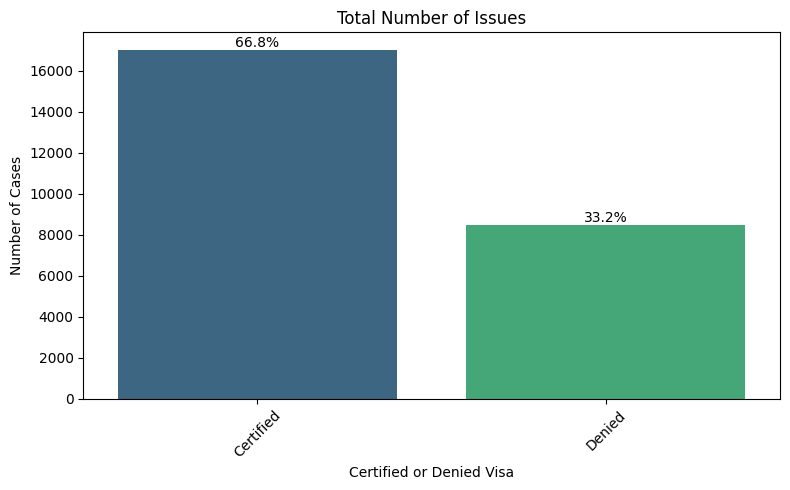

In [ ]:
order = data1['case_status'].value_counts().index
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='case_status', data=data1,order=order, palette='viridis')

# Total number of rows (cases)
total = len(data1)

# Add percentage labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    percent = (height / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Total Number of Issues')
plt.xlabel('Certified or Denied Visa')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

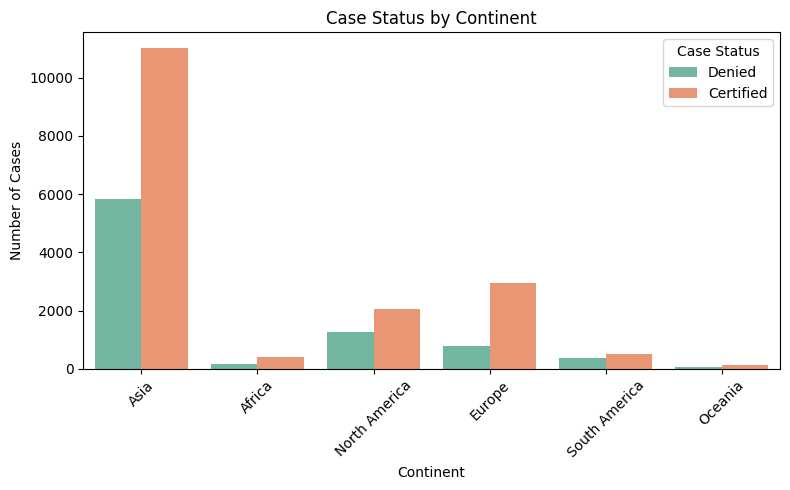

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='continent', hue='case_status', data=data1, palette='Set2')

plt.title('Case Status by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

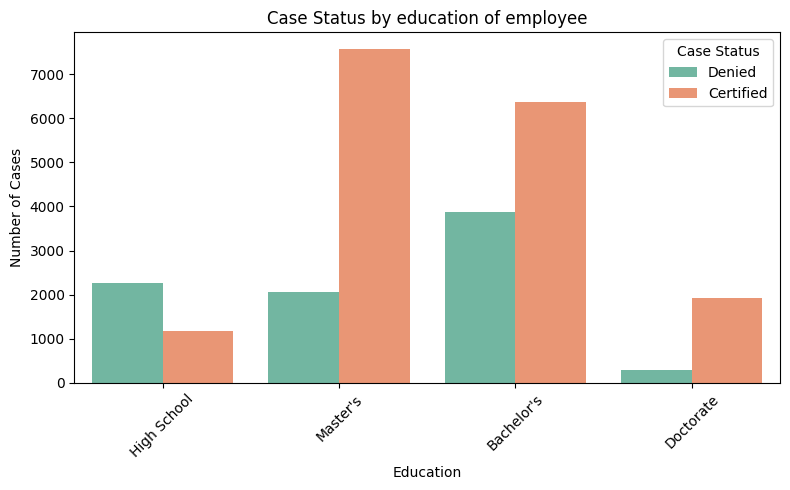

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='education_of_employee', hue='case_status', data=data1, palette='Set2')

plt.title('Case Status by education of employee')
plt.xlabel('Education')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

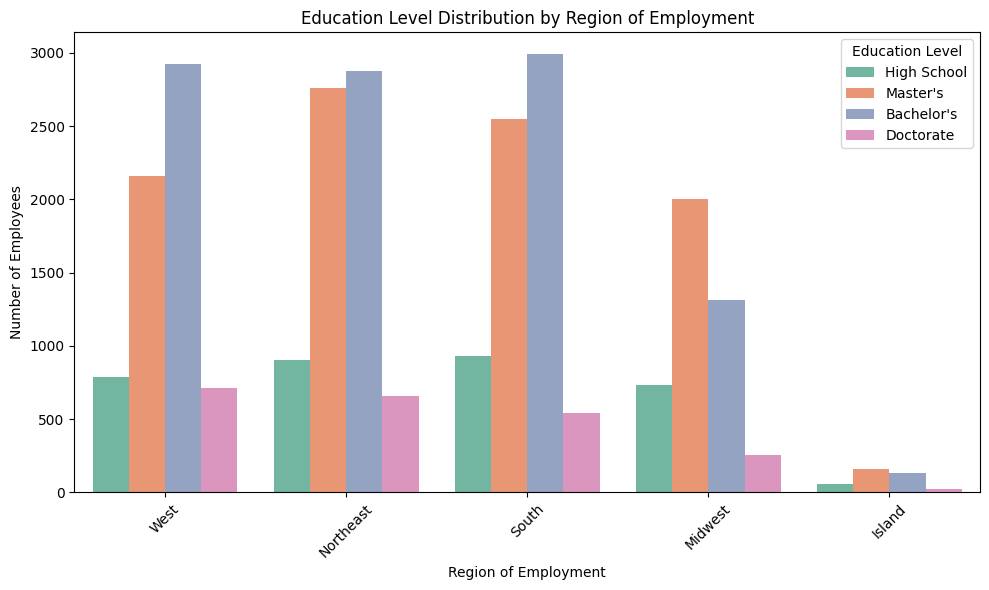

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region_of_employment', hue='education_of_employee', data=data1, palette='Set2')
plt.title('Education Level Distribution by Region of Employment')
plt.xlabel('Region of Employment')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()

In [ ]:
# To get Visualization of Number of employees as per education to a particular region
Number_of_employees_region_wise = pd.crosstab(data1['region_of_employment'], data1['education_of_employee'])
print(Number_of_employees_region_wise)

education_of_employee  Bachelor's  Doctorate  High School  Master's
region_of_employment                                               
Island                        129         25           60       161
Midwest                      1315        256          736      2000
Northeast                    2874        656          905      2760
South                        2991        541          934      2551
West                         2925        714          785      2162


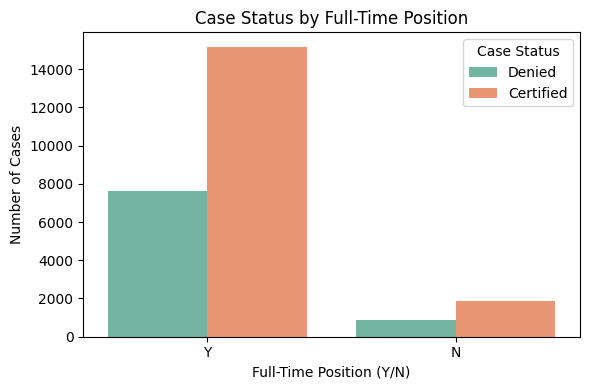

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='full_time_position', hue='case_status', data=data1, palette='Set2')

plt.title('Case Status by Full-Time Position')
plt.xlabel('Full-Time Position (Y/N)')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

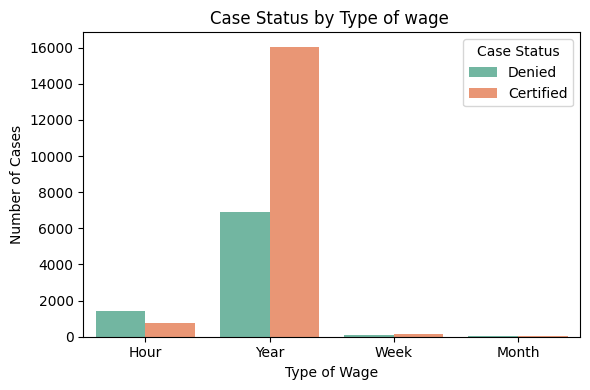

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='unit_of_wage', hue='case_status', data=data1, palette='Set2')

plt.title('Case Status by Type of wage ')
plt.xlabel('Type of Wage')
plt.ylabel('Number of Cases')
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Filter rows where unit_of_wage is 'Hour' AND case_status is 'Denied'
Education_of_hourly_basis = data1[
    (data1['unit_of_wage'] == 'Hour') &
    (data1['case_status'] == 'Denied')
]

# Step 2: Get the percentage distribution of education_of_employee in the filtered data
education_percent = (
    Education_of_hourly_basis['education_of_employee']
    .value_counts(normalize=True)  # get relative frequencies
    .mul(100)                      # convert to percentages
    .round(2)                      # round to 2 decimal places
)

# Step 3: Display the result
print(education_percent)

education_of_employee
Bachelor's    49.790
Master's      26.450
High School   21.060
Doctorate      2.700
Name: proportion, dtype: float64


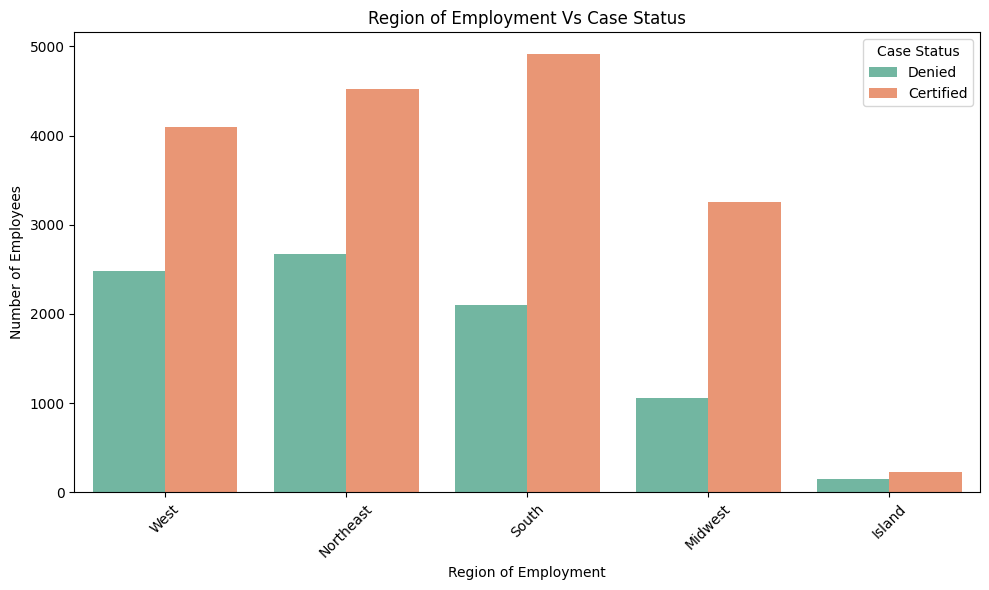

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region_of_employment', hue='case_status', data=data1, palette='Set2')
plt.title('Region of Employment Vs Case Status')
plt.xlabel('Region of Employment')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

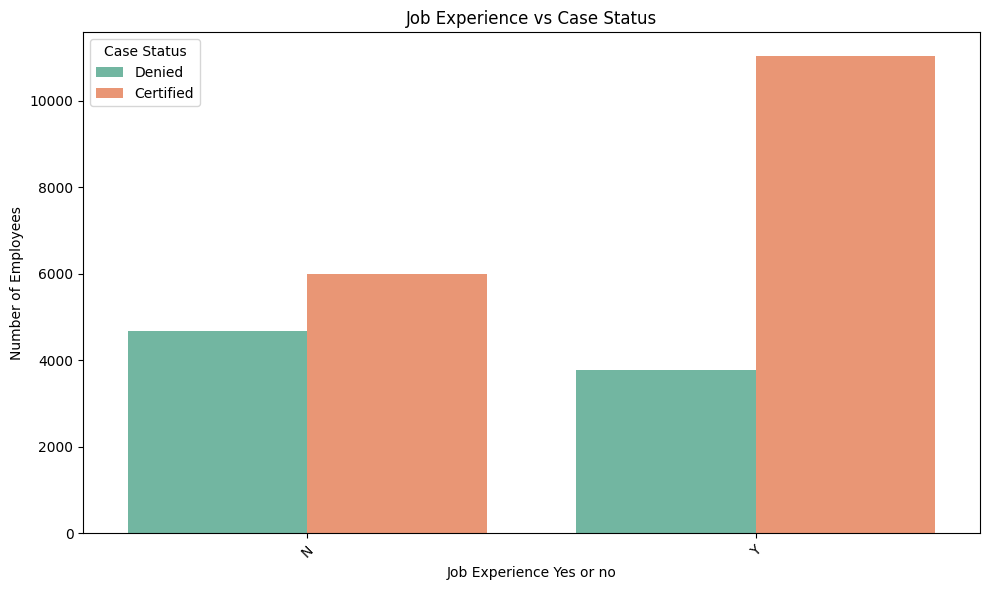

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='has_job_experience', hue='case_status', data=data1, palette='Set2')
plt.title('Job Experience vs Case Status')
plt.xlabel('Job Experience Yes or no')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

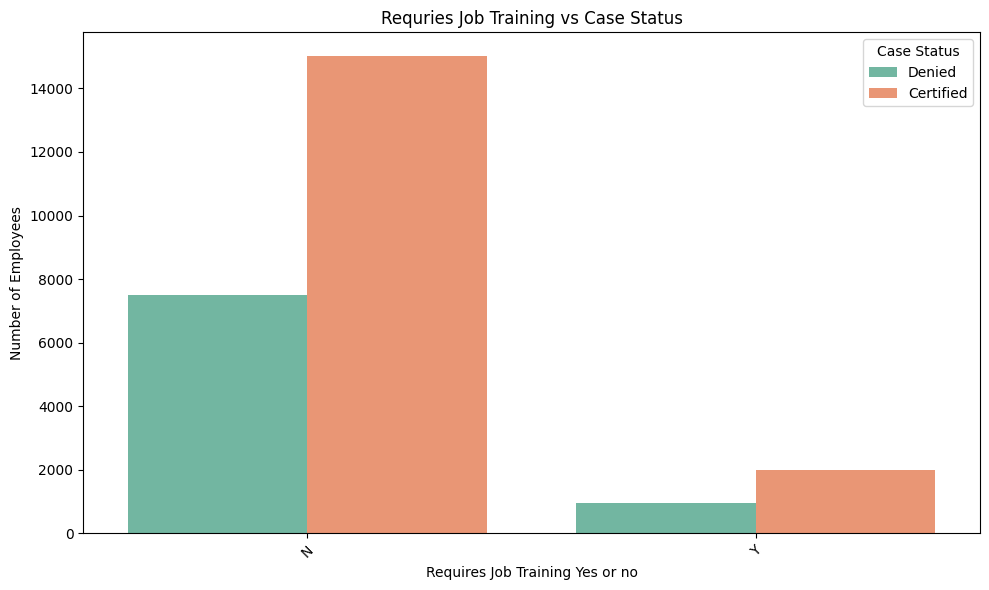

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='requires_job_training', hue='case_status', data=data1, palette='Set2')
plt.title('Requries Job Training vs Case Status')
plt.xlabel('Requires Job Training Yes or no')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()
plt.show()

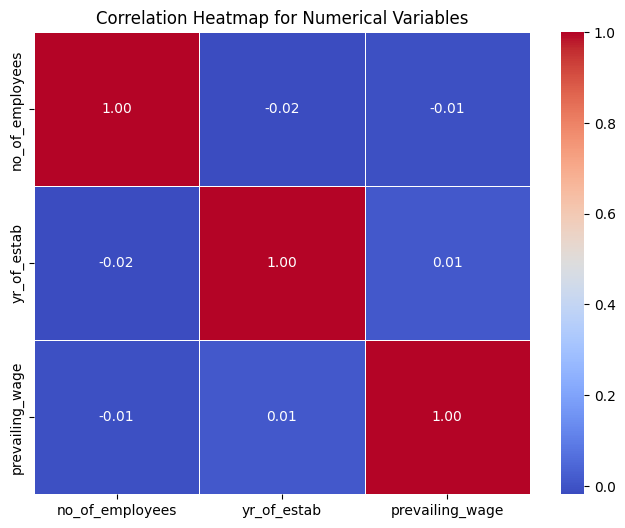

In [ ]:
num_df = data1.select_dtypes(include='number')
corr = num_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

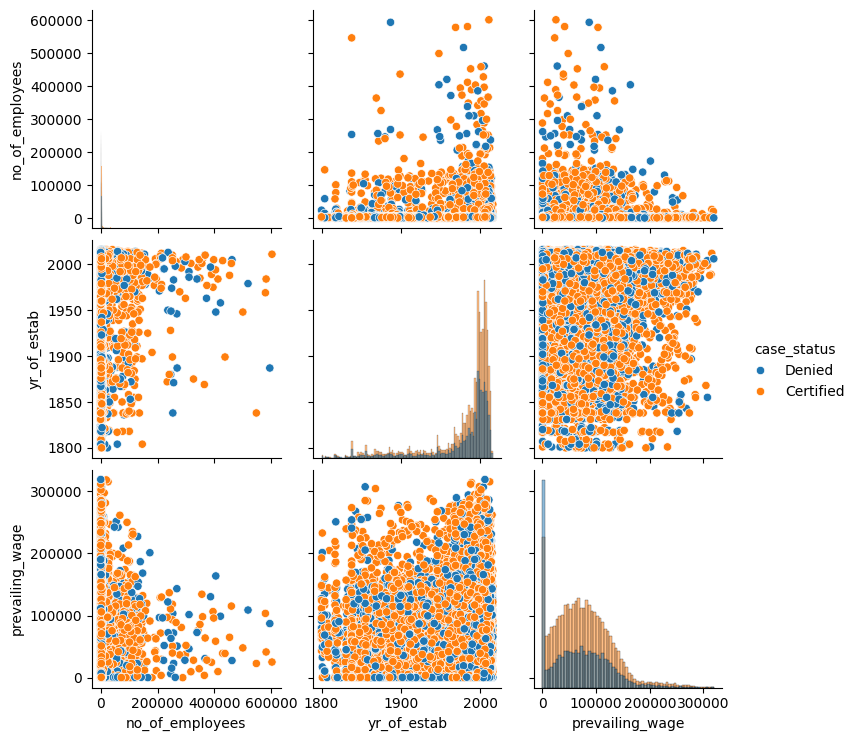

In [ ]:
sns.pairplot(data1, hue = 'case_status' , diag_kind='hist')

#DATA PREPROCESSING

In [ ]:
print(data1['continent'].unique())
print(data1['education_of_employee'].unique())
print(data1['has_job_experience'].unique())
print(data1['requires_job_training'].unique())
print(data1['region_of_employment'].unique())
print(data1['unit_of_wage'].unique())


['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
['High School' "Master's" "Bachelor's" 'Doctorate']
['N' 'Y']
['N' 'Y']
['West' 'Northeast' 'South' 'Midwest' 'Island']
['Hour' 'Year' 'Week' 'Month']


In [ ]:
continent_encoding= {'Africa':0, 'Asia':1, 'Europe':2, 'North America':3, 'Oceania':4, 'South America':5}
data1['continent']= data1['continent'].map(continent_encoding)
education_encoding= {'High School':0, "Bachelor's":1, 'Doctorate':2, "Master's":3}
data1['education_of_employee']= data1['education_of_employee'].map(education_encoding)
has_job_experience_encoding= {'N':0, 'Y':1}
data1['has_job_experience']= data1['has_job_experience'].map(has_job_experience_encoding)
requires_job_training_encoding= {'N':0, 'Y':1}
data1['requires_job_training']= data1['requires_job_training'].map(requires_job_training_encoding)
region_of_employment_encoding= {'Island':0,'Midwest':1,'Northeast':2,'South':3,'West':4}
data1['region_of_employment']= data1['region_of_employment'].map(region_of_employment_encoding)
unit_of_wage_encoding= {'Hour': 0, 'Month':1,'Week':3,'Year':4}
data1['unit_of_wage']= data1['unit_of_wage'].map(unit_of_wage_encoding)

In [ ]:
data1.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,1,0,0,0,14513,2007,4,592.203,0,Y,Denied
1,EZYV02,1,3,1,0,2412,2002,2,83425.650,4,Y,Certified
2,EZYV03,1,1,0,1,44444,2008,4,122996.860,4,Y,Denied
3,EZYV04,1,1,0,0,98,1897,4,83434.030,4,Y,Denied
4,EZYV05,0,3,1,0,1082,2005,3,149907.390,4,Y,Certified


In [ ]:
X = data1.drop(["case_status","case_id"], axis=1)
y = data1["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


In [ ]:
Q1_emp = X_train['no_of_employees'].quantile(0.25)
Q3_emp = X_train['no_of_employees'].quantile(0.75)
IQR_emp = Q3_emp - Q1_emp

lower_emp = Q1_emp - 1.5 * IQR_emp
upper_emp = Q3_emp + 1.5 * IQR_emp

# Cap values in all sets
X_train['no_of_employees'] = X_train['no_of_employees'].clip(lower_emp, upper_emp)
X_val['no_of_employees'] = X_val['no_of_employees'].clip(lower_emp, upper_emp)
X_test['no_of_employees'] = X_test['no_of_employees'].clip(lower_emp, upper_emp)

# -----------------------------
# For 'prevailing_wage'
# -----------------------------
Q1_wage = X_train['prevailing_wage'].quantile(0.25)
Q3_wage = X_train['prevailing_wage'].quantile(0.75)
IQR_wage = Q3_wage - Q1_wage

lower_wage = Q1_wage - 1.5 * IQR_wage
upper_wage = Q3_wage + 1.5 * IQR_wage

# Cap values in all sets
X_train['prevailing_wage'] = X_train['prevailing_wage'].clip(lower_wage, upper_wage)
X_val['prevailing_wage'] = X_val['prevailing_wage'].clip(lower_wage, upper_wage)
X_test['prevailing_wage'] = X_test['prevailing_wage'].clip(lower_wage, upper_wage)

<Axes: xlabel='no_of_employees'>

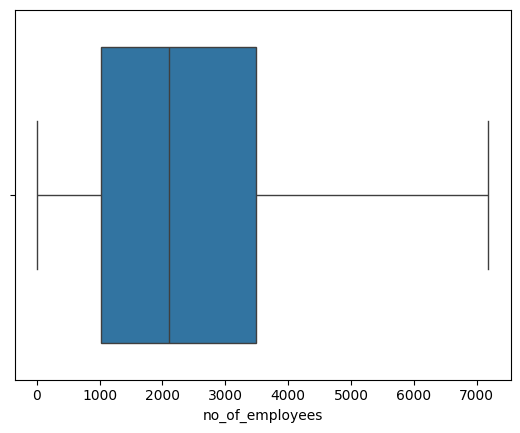

In [ ]:
sns.boxplot(x=X_train['no_of_employees'])

<Axes: xlabel='prevailing_wage'>

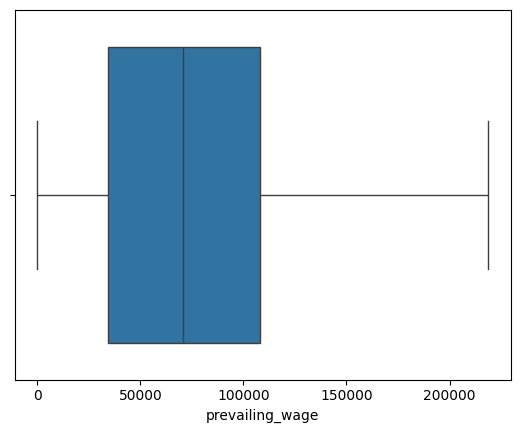

In [ ]:
sns.boxplot(x=X_train['prevailing_wage'])

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [ ]:
inverse_mapping(continent_encoding,"continent")
inverse_mapping(education_encoding, "education_of_employee")
inverse_mapping(has_job_experience_encoding,"has_job_experience")
inverse_mapping(requires_job_training_encoding,"requires_job_training")
inverse_mapping(region_of_employment_encoding,"region_of_employment")
inverse_mapping(unit_of_wage_encoding,"unit_of_wage")

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


# MODEL BUILDING

## Model Buildind with Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XG Boost",XGBClassifier(random_state=1, eval_metric='logloss')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.989662436921268
Random forest: 1.0
GBM: 0.8283947198375334
Adaboost: 0.8201569374518075
dtree: 1.0
XG Boost: 0.8955251738136345

Validation Performance:

Bagging: 0.7699050401753105
Random forest: 0.8054971252278783
GBM: 0.8265631498682934
Adaboost: 0.8180574555403557
dtree: 0.7444183313748531
XG Boost: 0.8117352614015573


In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))

Bagging: Training Score: 0.9897, Validation Score: 0.7699, Difference: 0.2198
Random forest: Training Score: 1.0000, Validation Score: 0.8055, Difference: 0.1945
GBM: Training Score: 0.8284, Validation Score: 0.8266, Difference: 0.0018
Adaboost: Training Score: 0.8202, Validation Score: 0.8181, Difference: 0.0021
dtree: Training Score: 1.0000, Validation Score: 0.7444, Difference: 0.2556
XG Boost: Training Score: 0.8955, Validation Score: 0.8117, Difference: 0.0838


## Model Building with Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XG Boost",XGBClassifier(random_state=1, eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9872968980797636
Random forest: 0.9999020568070519
GBM: 0.8068661563442356
Adaboost: 0.7990132316662929
dtree: 1.0
XG Boost: 0.8748132935026139

Validation Performance:

Bagging: 0.7605507333133792
Random forest: 0.7981690745243885
GBM: 0.8171129055106956
Adaboost: 0.817091660923501
dtree: 0.7303692539562924
XG Boost: 0.8088876388693573


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9873, Validation Score: 0.7606, Difference: 0.2267
Random forest: Training Score: 0.9999, Validation Score: 0.7982, Difference: 0.2017
GBM: Training Score: 0.8069, Validation Score: 0.8171, Difference: -0.0102
Adaboost: Training Score: 0.7990, Validation Score: 0.8171, Difference: -0.0181
dtree: Training Score: 1.0000, Validation Score: 0.7304, Difference: 0.2696
XG Boost: Training Score: 0.8748, Validation Score: 0.8089, Difference: 0.0659


## Model Building With Undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XG Boost",XGBClassifier(random_state=1, eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9794534211051267
Random forest: 1.0
GBM: 0.7279151943462897
Adaboost: 0.7078598032661637
dtree: 1.0
XG Boost: 0.8747922979180921

Validation Performance:

Bagging: 0.7042729268704611
Random forest: 0.7388144080116298
GBM: 0.7801308003737154
Adaboost: 0.7694699207212808
dtree: 0.6964630225080386
XG Boost: 0.7446468520294024


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9795, Validation Score: 0.7043, Difference: 0.2752
Random forest: Training Score: 1.0000, Validation Score: 0.7388, Difference: 0.2612
GBM: Training Score: 0.7279, Validation Score: 0.7801, Difference: -0.0522
Adaboost: Training Score: 0.7079, Validation Score: 0.7695, Difference: -0.0616
dtree: Training Score: 1.0000, Validation Score: 0.6965, Difference: 0.3035
XG Boost: Training Score: 0.8748, Validation Score: 0.7446, Difference: 0.1301


## Defining Functions for Tuning Metrics and for Confusion Matrix

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Tuning of Gradient boosting with Over Sampled Data and Undersampled Data

In [ ]:

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': np.int64(150), 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8023194489576031:


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=150,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=150, random_state=1, subsample=1)

In [ ]:
gbm_oversampled_tuned_train= model_performance_classification_sklearn(tuned_gbm1,X_train_over,y_train_over)
gbm_oversampled_tuned_train

,Accuracy,Recall,Precision,F1
0,0.807,0.869,0.773,0.818


In [ ]:
gbm_oversampled_tuned_validation= model_performance_classification_sklearn(tuned_gbm1,X_val,y_val)
gbm_oversampled_tuned_validation


,Accuracy,Recall,Precision,F1
0,0.753,0.859,0.790,0.823


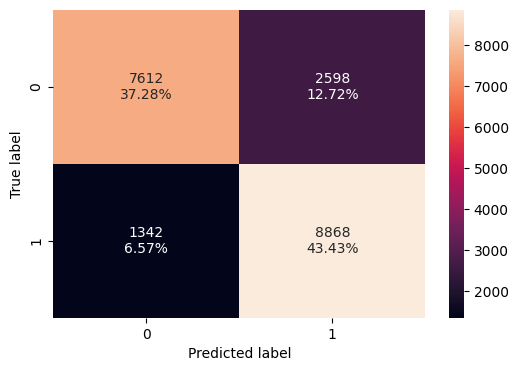

In [ ]:
confusion_matrix_sklearn(tuned_gbm1,X_train_over,y_train_over)

In [ ]:

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1,verbose=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(150), 'max_features': 0.5, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7139839641880916:


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [ ]:
gbm_undersampled_tuned_train= model_performance_classification_sklearn(tuned_gbm2,X_train_un,y_train_un)
gbm_undersampled_tuned_train

,Accuracy,Recall,Precision,F1
0,0.705,0.742,0.691,0.716


In [ ]:
gbm_undersampled_tuned_validation= model_performance_classification_sklearn(tuned_gbm2,X_val,y_val)
gbm_undersampled_tuned_validation

,Accuracy,Recall,Precision,F1
0,0.719,0.737,0.823,0.778


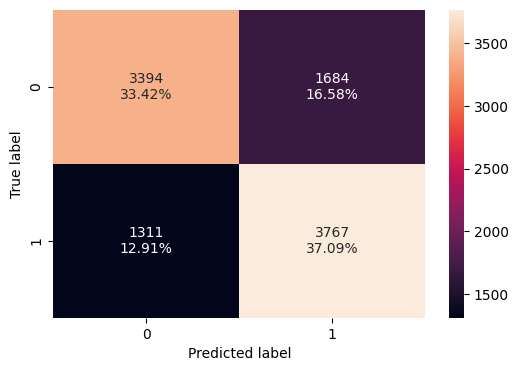

In [ ]:
confusion_matrix_sklearn(tuned_gbm2,X_train_un,y_train_un)

## ADABOOST Tuning with Undersampled and Oversampled Data

In [ ]:

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7943577461968205:


In [ ]:
tuned_adb_oversampled = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb_oversampled.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [ ]:
adb_oversampled_train= model_performance_classification_sklearn(tuned_adb_oversampled,X_train_over,y_train_over)
adb_oversampled_train

,Accuracy,Recall,Precision,F1
0,0.784,0.832,0.759,0.794


In [ ]:
adb_oversampled_validation= model_performance_classification_sklearn(tuned_adb_oversampled,X_val,y_val)
adb_oversampled_validation

,Accuracy,Recall,Precision,F1
0,0.739,0.826,0.792,0.809


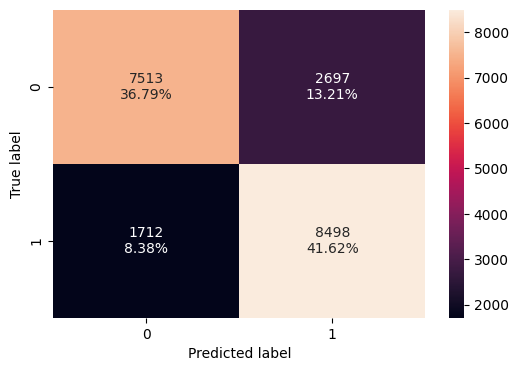

In [ ]:
confusion_matrix_sklearn(tuned_adb_oversampled,X_train_over,y_train_over)

In [ ]:

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(10), 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7116689445303896:


In [ ]:
tuned_adb_undersampled = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb_undersampled.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=10, random_state=1)

In [ ]:
tuned_adb_undersampled_train= model_performance_classification_sklearn(tuned_adb_undersampled,X_train_un,y_train_un)
tuned_adb_undersampled_train

,Accuracy,Recall,Precision,F1
0,0.689,0.800,0.655,0.720


In [ ]:
tuned_adb_undersampled_validation= model_performance_classification_sklearn(tuned_adb_undersampled,X_val,y_val)
tuned_adb_undersampled_validation

,Accuracy,Recall,Precision,F1
0,0.730,0.798,0.797,0.798


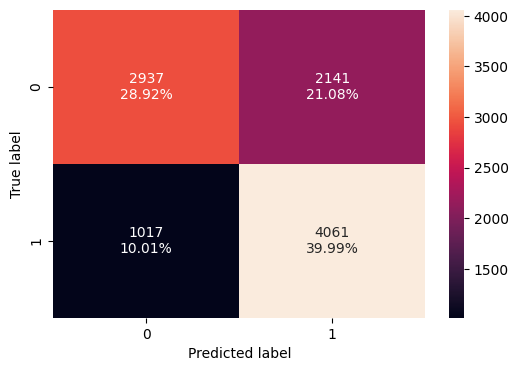

In [ ]:
confusion_matrix_sklearn(tuned_adb_undersampled,X_train_un,y_train_un)

# XG Boost Tuning with Undersampled and Oversampled Data

In [ ]:
Model= XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=parameters, n_jobs = -1, n_iter=50, scoring=acc_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'subsample': 1, 'scale_pos_weight': 2, 'n_estimators': np.int64(90), 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5} with CV score=0.81136382039198:


In [ ]:
XGB_Tuned_Oversampled= XGBClassifier(subsample=1,scale_pos_weight=2,n_estimators=90,learning_rate=0.2,gamma=0,colsample_bytree= 0.5,colsample_bylevel=0.5,random_state=1)
XGB_Tuned_Oversampled.fit(X_train_over,y_train_over)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=90, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
XGB_tuned_oversampled_train=model_performance_classification_sklearn (XGB_Tuned_Oversampled,X_train_over,y_train_over)
XGB_tuned_oversampled_train

,Accuracy,Recall,Precision,F1
0,0.806,0.963,0.733,0.833


In [ ]:
XGB_tuned_oversampled_validation=model_performance_classification_sklearn (XGB_Tuned_Oversampled,X_val,y_val)
XGB_tuned_oversampled_validation

,Accuracy,Recall,Precision,F1
0,0.732,0.934,0.735,0.823


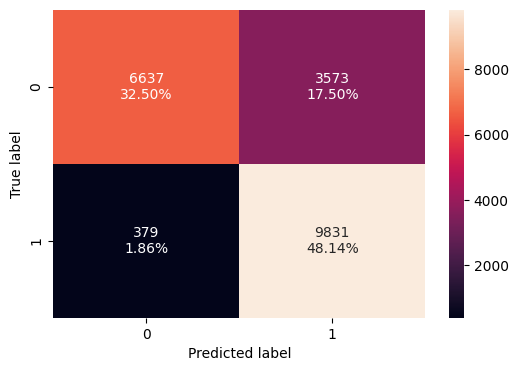

In [ ]:
confusion_matrix_sklearn(XGB_Tuned_Oversampled, X_train_over, y_train_over)

In [ ]:
Model= XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=parameters, n_jobs = -1, n_iter=50, scoring=acc_scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'subsample': 0.5, 'scale_pos_weight': 2, 'n_estimators': np.int64(50), 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.9} with CV score=0.732025599479212:


In [ ]:
XGB_Tuned_undersampled= XGBClassifier(subsample=0.5,scale_pos_weight=2,n_estimators=50,learning_rate=0.05,gamma=0,colsample_bytree= 0.7,colsample_bylevel=0.9,random_state=1)
XGB_Tuned_undersampled.fit(X_train_un,y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
XGB_tuned_undersampled_train=model_performance_classification_sklearn (XGB_Tuned_undersampled,X_train_un,y_train_un)
XGB_tuned_undersampled_train

,Accuracy,Recall,Precision,F1
0,0.699,0.908,0.640,0.751


In [ ]:
XGB_tuned_undersampled_validation=model_performance_classification_sklearn (XGB_Tuned_undersampled,X_val,y_val)
XGB_tuned_undersampled_validation

,Accuracy,Recall,Precision,F1
0,0.753,0.885,0.776,0.827


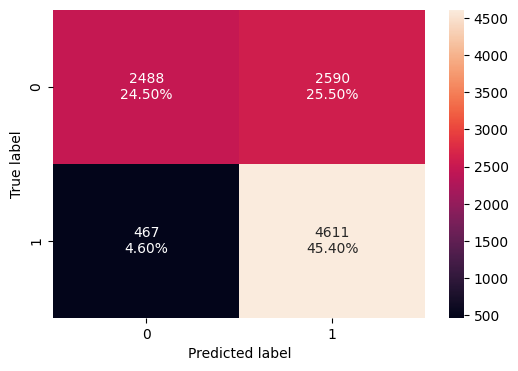

In [ ]:
confusion_matrix_sklearn(XGB_Tuned_undersampled, X_train_un, y_train_un)

Performance Comparison

In [ ]:

Oversampled_model_Training = pd.concat(
    [ gbm_oversampled_tuned_train,
      adb_oversampled_train,
      XGB_tuned_oversampled_train
      ],
    axis=0,
)
Oversampled_model_Training.index = [
    "Gradient Boosting with Oversampled Data",
    "Adaboost with Oversampled Data",
    "XGBoost with Oversampled Data",
]
Oversampled_model_Training


print("Training performance for oversampled data")
Oversampled_model_Training

Training performance for oversampled data


,Accuracy,Recall,Precision,F1
Gradient Boosting with Oversampled Data,0.807,0.869,0.773,0.818
Adaboost with Oversampled Data,0.784,0.832,0.759,0.794
XGBoost with Oversampled Data,0.806,0.963,0.733,0.833


In [ ]:

Oversampled_model_Validation= pd.concat(
    [ gbm_oversampled_tuned_validation,
      adb_oversampled_validation,
      XGB_tuned_oversampled_validation
      ],
    axis=0,
)
Oversampled_model_Validation.index = [
    "Gradient Boosting with Oversampled Data",
    "Adaboost with Oversampled Data",
    "XGBoost with Oversampled Data",
]
Oversampled_model_Validation


print("Validation performance for oversampled data")
Oversampled_model_Validation

Validation performance for oversampled data


,Accuracy,Recall,Precision,F1
Gradient Boosting with Oversampled Data,0.753,0.859,0.790,0.823
Adaboost with Oversampled Data,0.739,0.826,0.792,0.809
XGBoost with Oversampled Data,0.732,0.934,0.735,0.823


In [ ]:

Undersampled_Traning_performance = pd.concat(
    [ gbm_undersampled_tuned_train,
      tuned_adb_undersampled_train,
      XGB_tuned_undersampled_train,
      ],
    axis=0,
)
Undersampled_Traning_performance.index = [
    "Gradient Boosting with Undersampled Data",
    "Adaboost with Undersampled Data",
    "XGBoost with Undersampled Data",
]
Undersampled_Traning_performance


print("Training performance for Undersampled data")
Undersampled_Traning_performance

Training performance for Undersampled data


,Accuracy,Recall,Precision,F1
Gradient Boosting with Undersampled Data,0.705,0.742,0.691,0.716
Adaboost with Undersampled Data,0.689,0.800,0.655,0.720
XGBoost with Undersampled Data,0.699,0.908,0.640,0.751


In [ ]:
Undersampled_Validation_performance = pd.concat(
    [ gbm_undersampled_tuned_validation,
      tuned_adb_undersampled_validation,
      XGB_tuned_undersampled_validation,
      ],
    axis=0,
)
Undersampled_Validation_performance.index = [
    "Gradient Boosting with Undersampled Data",
    "Adaboost with Undersampled Data",
    "XGBoost with Undersampled Data",
]
Undersampled_Validation_performance


print("Validation performance for Undersampled data")
Undersampled_Validation_performance

Validation performance for Undersampled data


,Accuracy,Recall,Precision,F1
Gradient Boosting with Undersampled Data,0.719,0.737,0.823,0.778
Adaboost with Undersampled Data,0.730,0.798,0.797,0.798
XGBoost with Undersampled Data,0.753,0.885,0.776,0.827


# Final Test with best model as XGBOOST

In [ ]:
XGBOOST= model_performance_classification_sklearn(XGB_Tuned_Oversampled, X_test, y_test)
XGBOOST

,Accuracy,Recall,Precision,F1
0,0.719,0.935,0.724,0.816


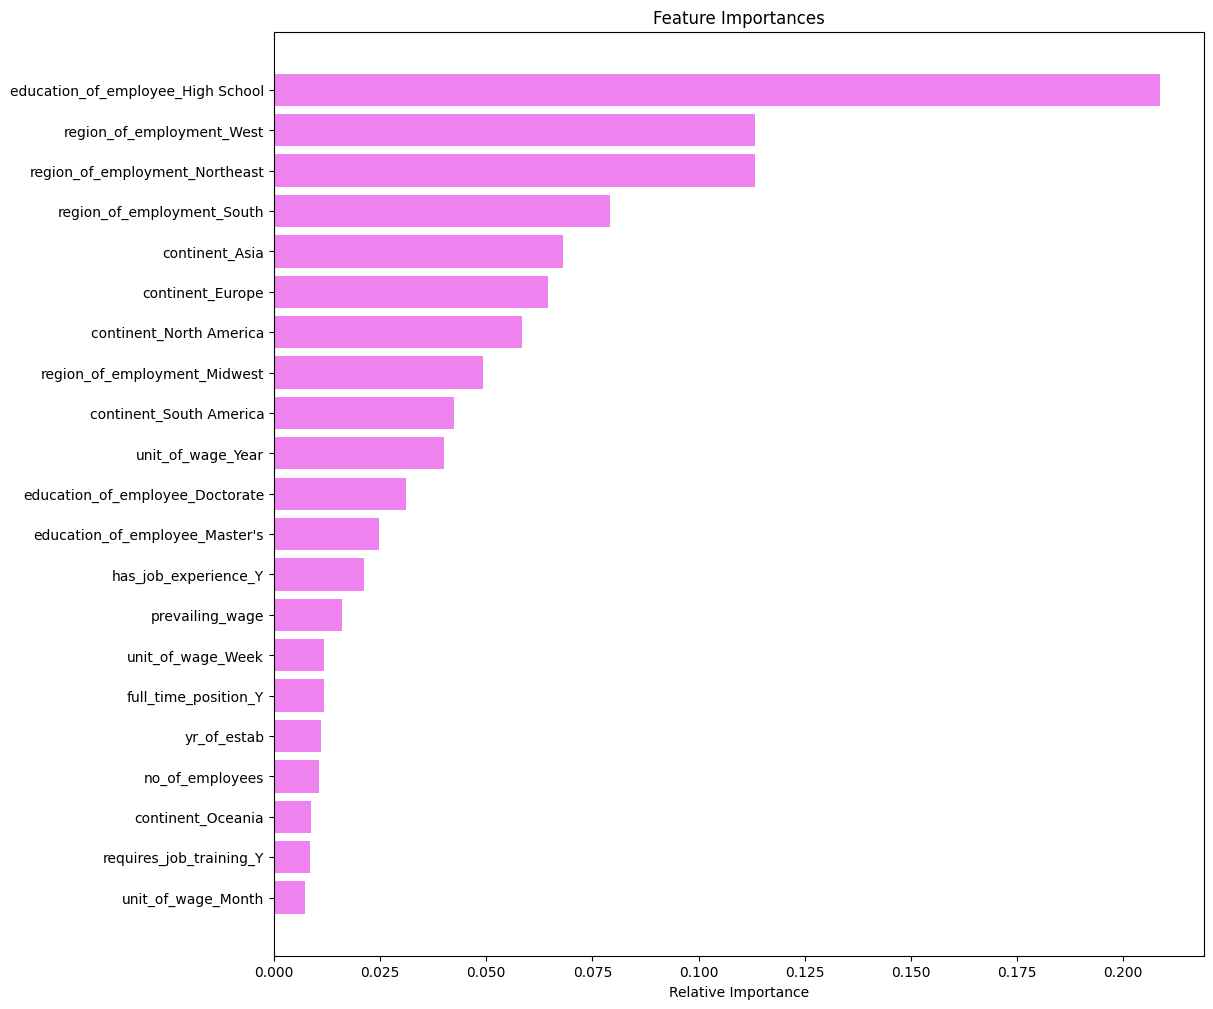

In [ ]:
feature_names = X_train.columns
importances = XGB_Tuned_Oversampled.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()